In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_h = pd.read_csv("kc_house_data.csv")
df_h.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df_l = pd.read_csv("laptop_price.csv", encoding="latin-1")
df_l.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Задача 1.
1. Скачать следующие данные: kc-house-data и laptop_price
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

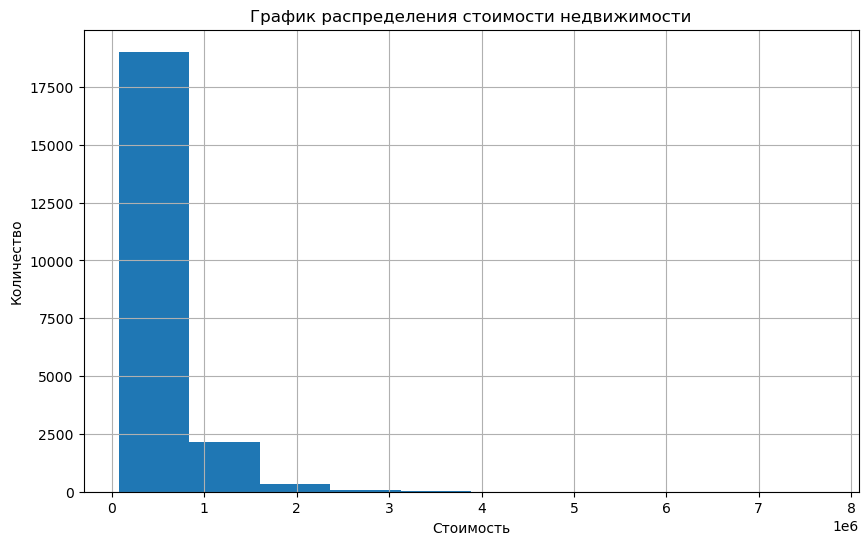

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df_h.price)
plt.title("График распределения стоимости недвижимости")
plt.xlabel("Стоимость")
plt.ylabel("Количество")
plt.grid();

Вывод:

    График демонстрирует обратную пропорциональную зависимость между стоимостью и количеством объектов недвижимости.
    Эта зависимость отражает структуру рынка, спрос и предложение в разных ценовых сегментах.


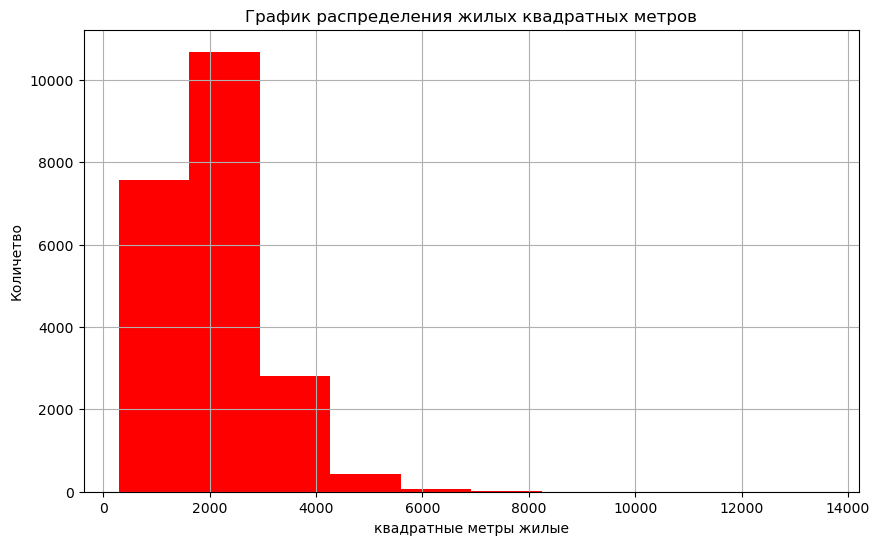

In [84]:
plt.figure(figsize=(10,6))
plt.hist(df_h.sqft_living, color="red")
plt.xlabel("квадратные метры жилые")
plt.ylabel("Количетво")
plt.title("График распределения жилых квадратных метров")
plt.grid();

Вывод:

    Распределение домов по жилой площади отражает текущую ситуацию на рынке недвижимости.
    Доминируют дома с площадью менее 2500 кв.м., что может быть связано с балансом между ценой, функциональностью и спросом.

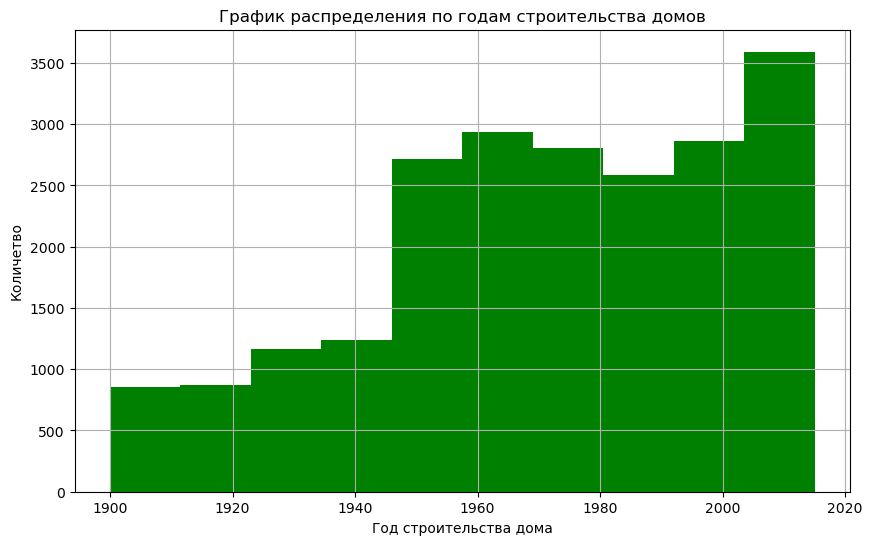

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(df_h.yr_built, color="green")
plt.xlabel("Год строительства дома")
plt.ylabel("Количетво")
plt.title("График распределения по годам строительства домов")
plt.grid();

Вывод:

    Распределение домов по году постройки отражает исторические события и особенности развития рынка недвижимости.
    Доминируют дома, построенные после 1945 года, что может быть связано с интенсивным строительством, моральным износом старых домов и сносом ветхого жилья.


Задача 2
1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

In [86]:
data_w = df_h.waterfront.value_counts()
data_w.index = ['no', 'yes']
data_w

no     21450
yes      163
Name: count, dtype: int64

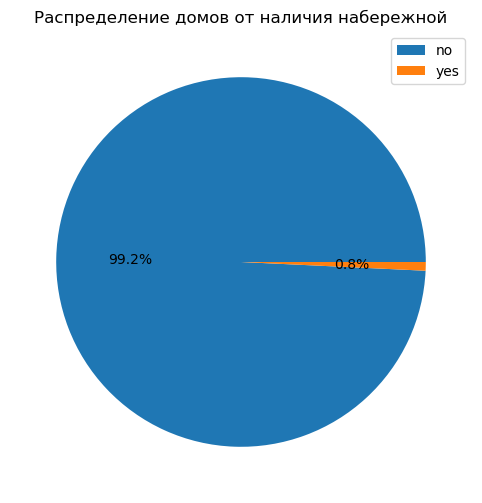

In [87]:
plt.figure(figsize=(10,6))
plt.pie(data_w, autopct='%1.1f%%')
plt.title("Распределение домов от наличия набережной")
plt.legend(data_w.index)
plt.show()

In [88]:
stat = df_h.groupby(['floors'], as_index=False)[['id']].count()
stat = stat.rename(columns={"id":"count"})
stat

,floors,count
0,1.0,10680
1,1.5,1910
2,2.0,8241
3,2.5,161
4,3.0,613
5,3.5,8


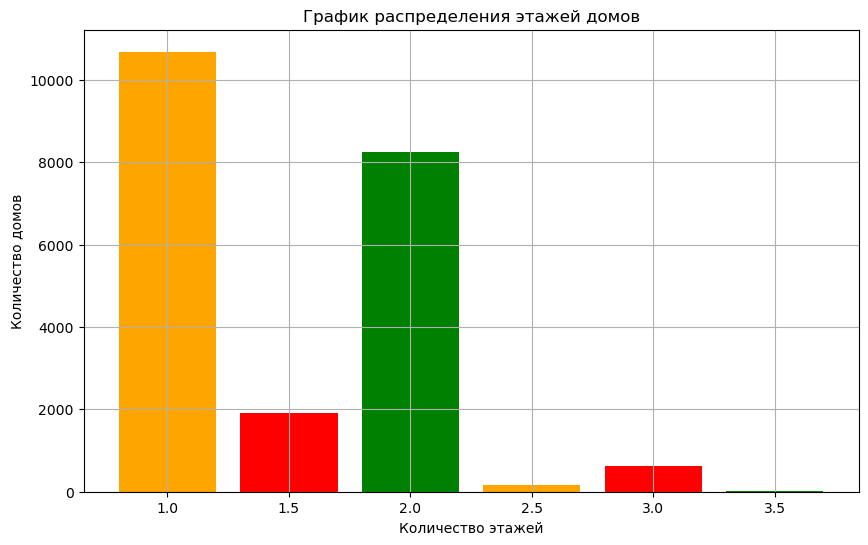

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(stat['floors'], stat['count'], color=['orange', 'red', 'green'], width=0.4)
plt.xlabel("Количество этажей")
plt.ylabel("Количество домов")
plt.title("График распределения этажей домов")
plt.grid();

Вывод:

    Распределение домов по этажности отражает текущую ситуацию на рынке недвижимости.
    Доминируют дома с 1-2 этажами, что может быть связано с их практичностью, доступностью и соотношением спроса и предложения.

In [90]:
df_h.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [91]:
stat_c = df_h.groupby(['condition'], as_index=False)[['id']].count()
stat_c = stat_c.rename(columns={"id":"count"})
stat_c

,condition,count
0,1,30
1,2,172
2,3,14031
3,4,5679
4,5,1701


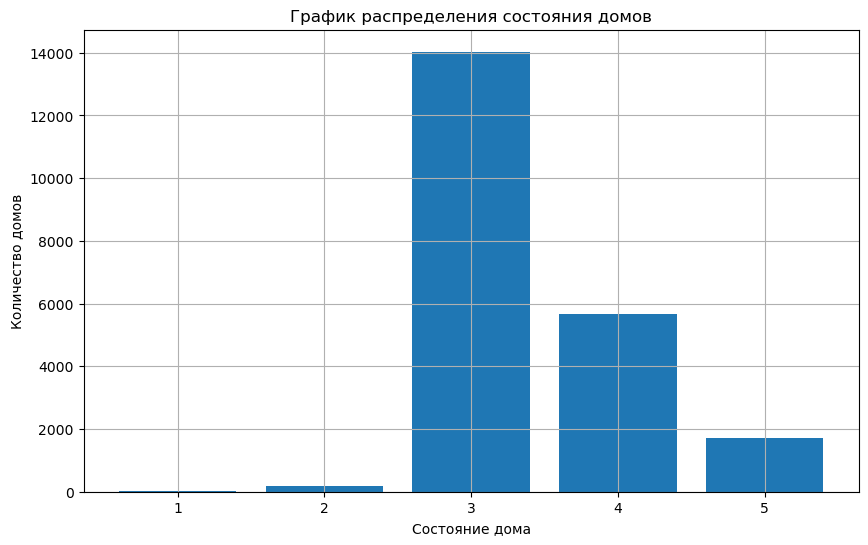

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(stat_c['condition'], stat_c['count'])
plt.xlabel('Состояние дома')
plt.ylabel("Количество домов")
plt.title("График распределения состояния домов")
plt.grid()

 Вывод:

    Распределение домов по состоянию отражает текущую ситуацию на рынке недвижимости.
    Доминирует категория "среднее состояние", что может быть связано с балансом между ценой и качеством, а также с соотношением спроса и предложения.



3)Задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [93]:
import seaborn as sns

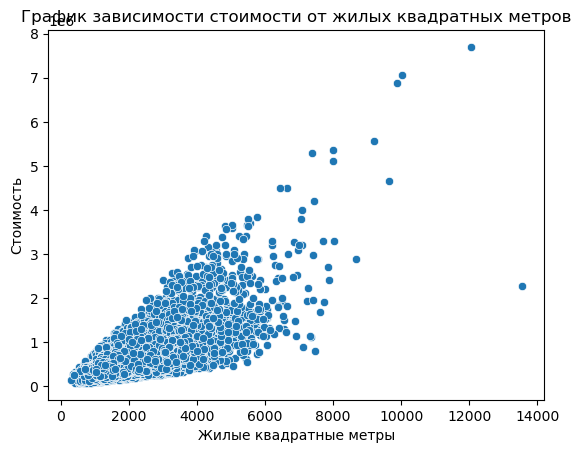

In [94]:
sns.scatterplot(x=df_h["sqft_living"], y=df_h["price"])
plt.title("График зависимости стоимости от жилых квадратных метров")
plt.xlabel("Жилые квадратные метры")
plt.ylabel("Стоимость");

Вывод:

    Площадь жилых помещений является одним из основных факторов, влияющих на стоимость дома.
    Покупатели, как правило, отдают предпочтение более просторным вариантам, что отражается на ценах.


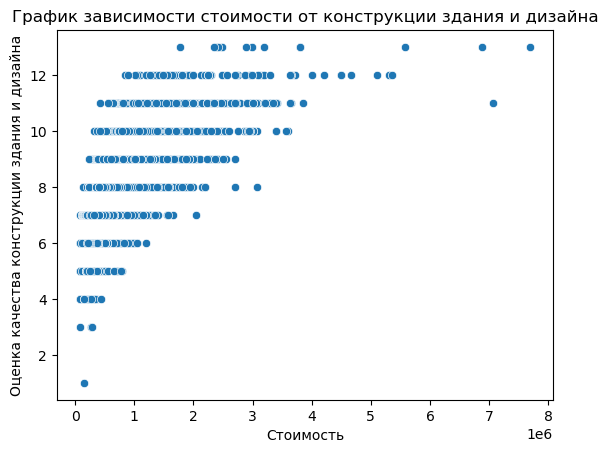

In [95]:
sns.scatterplot(x=df_h["price"], y=df_h["grade"])
plt.title("График зависимости стоимости от конструкции здания и дизайна")
plt.xlabel("Стоимость")
plt.ylabel("Оценка качества конструкции здания и дизайна");

Вывод:

    Качество конструкции и дизайна является одним из ключевых факторов, влияющих на стоимость дома.
    Покупатели готовы инвестировать больше средств в недвижимость, которая обеспечивает комфорт, надежность и эстетическую привлекательность.


In [96]:
sat = df_h[df_h["yr_renovated"] != 0]

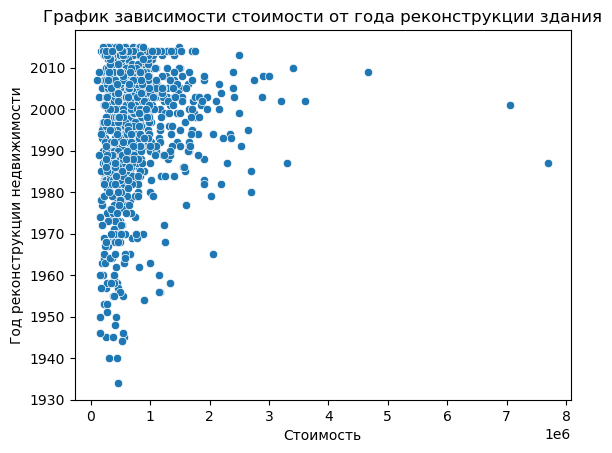

In [97]:
sns.scatterplot(x=df_h["price"], y= sat['yr_renovated'])
plt.title("График зависимости стоимости от года реконструкции здания")
plt.xlabel("Стоимость")
plt.ylabel("Год реконструкции недвижимости");

 Вывод:

    Год реконструкции не всегда является ключевым фактором при оценке стоимости дома.
    Для определения реальной цены необходимо комплексно учитывать все характеристики объекта недвижимости.